In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
df = pd.read_csv('df.csv')

In [45]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
target = df.loc[:,'proportion']

### Normal Linear Regression

In [46]:
X_train1, X_test1, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

X_train1, X_val1, y_train, y_val = train_test_split(X_train1, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_val = scaler.fit_transform(X_val1)
X_test = scaler.transform(X_test1)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.27490636569558236

In [47]:
m.score(X_val,y_val)

-1.423618243724582e+25

In [48]:
m.score(X_test,y_test)

-3.7668614726033286e+25

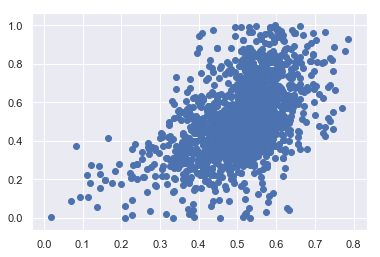

In [49]:
plt.scatter(m.predict(X_train),y_train)

(array([ 10.,  49., 106., 217., 391., 408., 199.,  57.,  12.,   9.]),
 array([-0.55038243, -0.43610729, -0.32183215, -0.20755701, -0.09328187,
         0.02099326,  0.1352684 ,  0.24954354,  0.36381868,  0.47809382,
         0.59236895]),
 <a list of 10 Patch objects>)

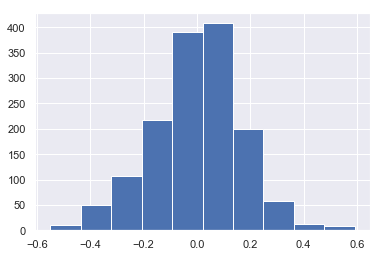

In [50]:
plt.hist(m.predict(X_train)-y_train)

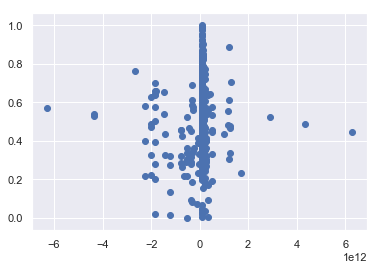

In [51]:
plt.scatter(m.predict(X_val),y_val)

(array([  1.,   2.,   1.,  23.,  41., 414.,   2.,   1.,   1.,   1.]),
 array([-6.27496153e+12, -5.02071793e+12, -3.76647432e+12, -2.51223072e+12,
        -1.25798712e+12, -3.74351821e+09,  1.25050008e+12,  2.50474369e+12,
         3.75898729e+12,  5.01323089e+12,  6.26747449e+12]),
 <a list of 10 Patch objects>)

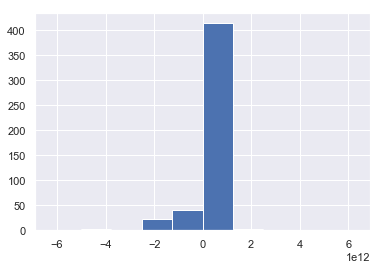

In [52]:
plt.hist(m.predict(X_val)-y_val)

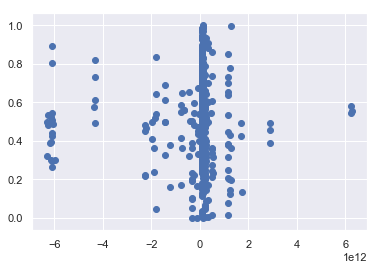

In [53]:
plt.scatter(m.predict(X_test),y_test)

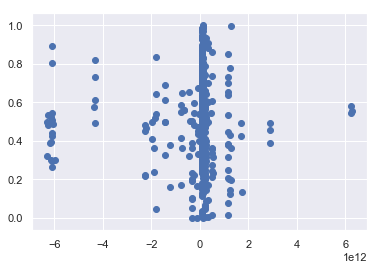

In [175]:
plt.scatter(m.predict(X_test)-y_test, y_test)

(array([ 18.,   5.,   0.,  19.,  36., 556.,   9.,   3.,   0.,   3.]),
 array([-6.28774015e+12, -5.03221869e+12, -3.77669722e+12, -2.52117576e+12,
        -1.26565429e+12, -1.01328288e+10,  1.24538864e+12,  2.50091010e+12,
         3.75643156e+12,  5.01195303e+12,  6.26747449e+12]),
 <a list of 10 Patch objects>)

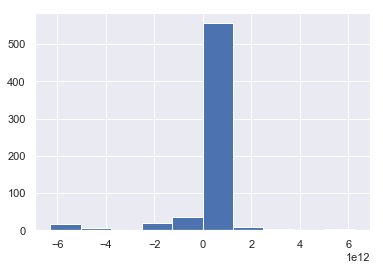

In [54]:
plt.hist(m.predict(X_test)-y_test)

In [55]:
c = list(zip(features.columns,m.coef_))
c = sorted(c, key=lambda x: x[1])
c

[('budget', -0.058831054169502656),
 ('ratings_count', -0.027809041280390148),
 ('Animation', -0.02729034423828125),
 ('year', -0.025453407246403603),
 ('Romance', -0.01593017578125),
 ('Fantasy', -0.012939453125),
 ('Adventure', -0.0104522705078125),
 ('Thriller', -0.008941650390625),
 ('Music', -0.0068817138671875),
 ('Musical', -0.0061473846435546875),
 ('Horror', -0.0056915283203125),
 ('Drama', -0.005199432373046875),
 ('Action', -0.00408935546875),
 ('runtime', -0.0036644160795053686),
 ('Crime', -0.0009002685546875),
 ('Sci-Fi', 0.000152587890625),
 ('Mystery', 0.0014801025390625),
 ('Biography', 0.0023193359375),
 ('War', 0.00250244140625),
 ('Family', 0.00276947021484375),
 ('History', 0.00388336181640625),
 ('user_rating', 0.003926662369128703),
 ('Western', 0.005215644836425781),
 ('Documentary', 0.0054168701171875),
 ('Film-Noir', 0.00732421875),
 ('Sport', 0.0112152099609375),
 ('Comedy', 0.01727294921875),
 ('usa_gross', 0.04236540451318506),
 ('NC-17', 43475673677.87643)

In [56]:
RMSE(m.predict(X_train),y_train)

0.16840915373265072

In [57]:
RMSE(m.predict(X_val),y_val)

745271313075.5525

In [58]:
RMSE(m.predict(X_test),y_test)

1268811474127.6562

### Polynomial (2nd-degree), unregularized

In [59]:
poly2 = PolynomialFeatures(2)

lm_poly2 = LinearRegression()
lm_poly2.fit(poly2.fit_transform(X_train), y_train)
lm_poly2.score(poly2.fit_transform(X_train), y_train)

0.6361153614207375

In [60]:
lm_poly2.score(poly2.fit_transform(X_val), y_val)

-5.467722343616611e+24

In [61]:
lm_poly2.score(poly2.fit_transform(X_test), y_test)

-7.438670695592395e+24

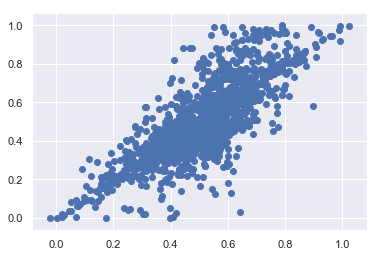

In [62]:
plt.scatter(lm_poly2.predict(poly2.transform(X_train)), y_train)

(array([ 10.,  41., 123., 331., 651., 225.,  56.,  16.,   4.,   1.]),
 array([-0.43882048, -0.33377457, -0.22872865, -0.12368273, -0.01863681,
         0.08640911,  0.19145503,  0.29650095,  0.40154686,  0.50659278,
         0.6116387 ]),
 <a list of 10 Patch objects>)

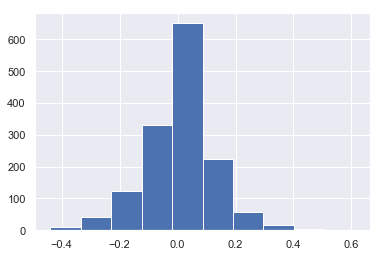

In [63]:
plt.hist(lm_poly2.predict(poly2.transform(X_train))- y_train)

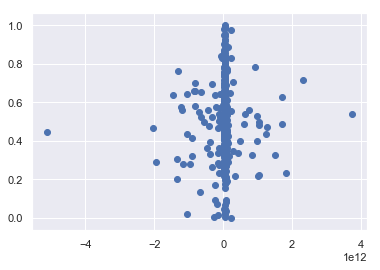

In [64]:
plt.scatter(lm_poly2.predict(poly2.transform(X_val)), y_val)

(array([  1.,   0.,   0.,   2.,  18., 438.,  20.,   6.,   1.,   1.]),
 array([-5.10498831e+12, -4.22044723e+12, -3.33590616e+12, -2.45136508e+12,
        -1.56682400e+12, -6.82282926e+11,  2.02258151e+11,  1.08679923e+12,
         1.97134030e+12,  2.85588138e+12,  3.74042246e+12]),
 <a list of 10 Patch objects>)

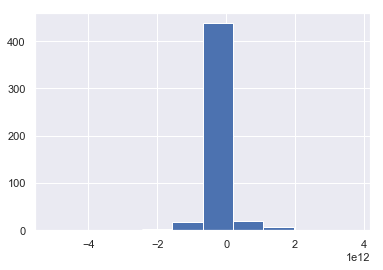

In [65]:
plt.hist(lm_poly2.predict(poly2.transform(X_val))- y_val)

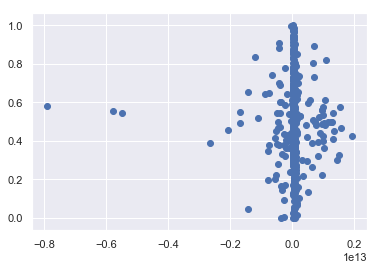

In [66]:
plt.scatter(lm_poly2.predict(poly2.transform(X_test)), y_test)

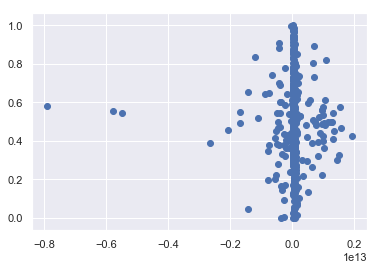

In [176]:
plt.scatter((lm_poly2.predict(poly2.transform(X_test))- y_test),y_test)

(array([  1.,   0.,   2.,   0.,   0.,   2.,   6.,  47., 567.,  24.]),
 array([-7.90525184e+12, -6.92189043e+12, -5.93852901e+12, -4.95516760e+12,
        -3.97180618e+12, -2.98844477e+12, -2.00508336e+12, -1.02172194e+12,
        -3.83605280e+10,  9.45000886e+11,  1.92836230e+12]),
 <a list of 10 Patch objects>)

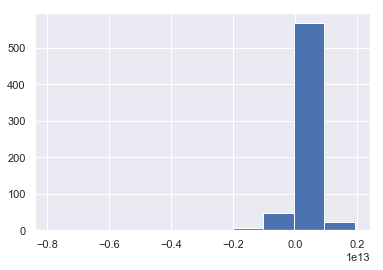

In [67]:
plt.hist(lm_poly2.predict(poly2.transform(X_test))- y_test)

In [68]:
RMSE(lm_poly2.predict(poly2.transform(X_train)), y_train)

0.11930276479541174

In [69]:
RMSE(lm_poly2.predict(poly2.transform(X_val)), y_val)

461871174396.60913

In [70]:
RMSE(lm_poly2.predict(poly2.transform(X_test)), y_test)

563838775758.9766

In [116]:
feats = poly2.get_feature_names()
c = list(zip(feats,lm_poly2.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x22', 56410893170.02425),
 ('x23', 57400208779.05499),
 ('x7', 97335180722.3987),
 ('x12', 119338564567.8518),
 ('x33', 122657001454.85493),
 ('x20', 124959552434.52222),
 ('x24', 156851795419.54974),
 ('x27', 177352154143.64835),
 ('x25', 206475586603.38055)]

### Polynomial (3rd-degree), unregularized

In [98]:
poly3 = PolynomialFeatures(3)

lm_poly3 = LinearRegression()
lm_poly3.fit(poly3.fit_transform(X_train), y_train)
lm_poly3.score(poly3.fit_transform(X_train), y_train)

1.0

In [99]:
lm_poly3.score(poly3.fit_transform(X_val), y_val)

-657.9346056553585

In [100]:
lm_poly3.score(poly3.fit_transform(X_test), y_test)

-1818.2103099032463

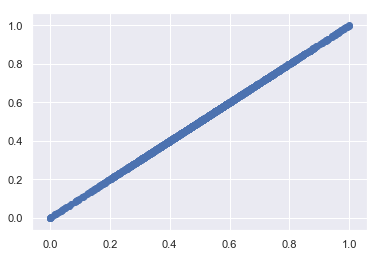

In [101]:
plt.scatter(lm_poly3.predict(poly3.transform(X_train)), y_train)

(array([  3.,   2.,  28., 600.,  13.,   0.,   1.,   1.,   0.,   1.]),
 array([-63.70749181, -44.97667989, -26.24586797,  -7.51505605,
         11.21575587,  29.94656779,  48.67737971,  67.40819163,
         86.13900355, 104.86981546, 123.60062738]),
 <a list of 10 Patch objects>)

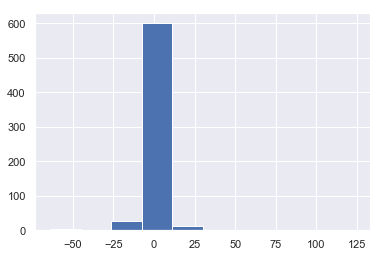

In [102]:
plt.hist(lm_poly3.predict(poly3.transform(X_test))- y_test)

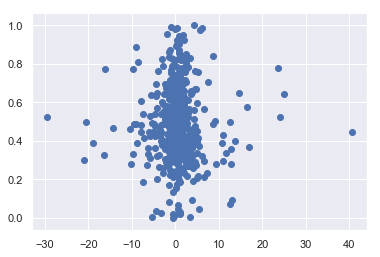

In [103]:
plt.scatter(lm_poly3.predict(poly3.transform(X_val)), y_val)

(array([  1.,   5.,  10.,  78., 365.,  15.,   9.,   3.,   0.,   1.]),
 array([-29.89782318, -22.90125905, -15.90469493,  -8.9081308 ,
         -1.91156668,   5.08499745,  12.08156157,  19.0781257 ,
         26.07468982,  33.07125395,  40.06781807]),
 <a list of 10 Patch objects>)

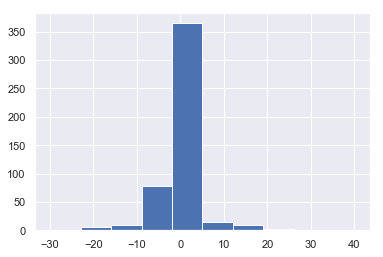

In [104]:
plt.hist(lm_poly3.predict(poly3.transform(X_val))- y_val)

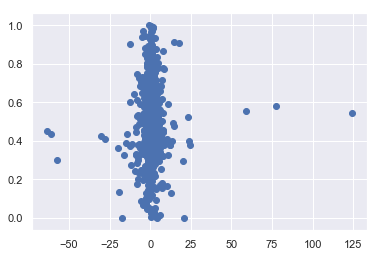

In [105]:
plt.scatter(lm_poly3.predict(poly3.transform(X_test)), y_test)

(array([  3.,   2.,  28., 600.,  13.,   0.,   1.,   1.,   0.,   1.]),
 array([-63.70749181, -44.97667989, -26.24586797,  -7.51505605,
         11.21575587,  29.94656779,  48.67737971,  67.40819163,
         86.13900355, 104.86981546, 123.60062738]),
 <a list of 10 Patch objects>)

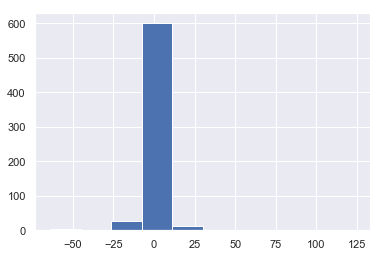

In [106]:
plt.hist(lm_poly3.predict(poly3.transform(X_test))- y_test)

In [107]:
RMSE(lm_poly3.predict(poly3.transform(X_train)), y_train)

2.7225099879635275e-13

In [108]:
RMSE(lm_poly3.predict(poly3.transform(X_val)), y_val)

5.070359938059483

In [109]:
RMSE(lm_poly3.predict(poly3.transform(X_test)), y_test)

8.817566163228921

In [110]:
params = []
for each in features:
    params.append(poly2.get_params(each))

In [115]:
feats = poly3.get_feature_names()
c = list(zip(feats,lm_poly3.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x0 x55 x62', 0.5164559124344671),
 ('x2 x5 x45', 0.5259398649730822),
 ('x1^2 x47', 0.5297921490601942),
 ('x1 x2', 0.556184623900111),
 ('x0 x1 x2', 0.6006022270903557),
 ('x1 x4 x50', 0.6383262904025876),
 ('x1 x5 x21', 0.673338961408061),
 ('x1 x47 x59', 0.7487205487317052),
 ('x2 x4 x43', 0.7545912242678078)]

### Polynomial (3rd-degree), regularized with Ridge

In [146]:
r = RidgeCV()
r.fit(poly3.fit_transform(X_train),y_train)
r.score(poly3.fit_transform(X_train),y_train)

0.9350015508198091

In [147]:
r.score(poly3.fit_transform(X_val),y_val)

-6.652540262142576

In [148]:
r.score(poly3.fit_transform(X_test),y_test)

-4.894997835762132

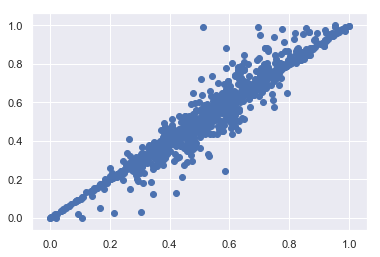

In [150]:
plt.scatter(r.predict(poly3.fit_transform(X_train)),y_train)

(array([1.000e+00, 0.000e+00, 3.000e+00, 1.300e+01, 6.600e+01, 1.085e+03,
        2.360e+02, 4.500e+01, 6.000e+00, 3.000e+00]),
 array([-0.48016403, -0.39783418, -0.31550434, -0.23317449, -0.15084464,
        -0.06851479,  0.01381506,  0.09614491,  0.17847476,  0.26080461,
         0.34313446]),
 <a list of 10 Patch objects>)

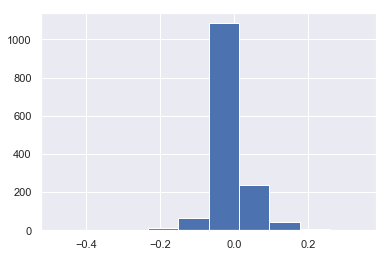

In [153]:
plt.hist(r.predict(poly3.fit_transform(X_train))-y_train)

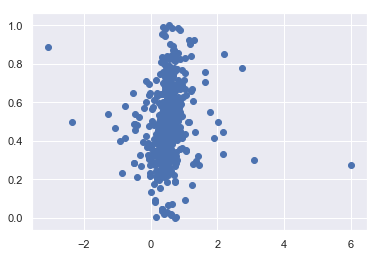

In [154]:
plt.scatter(r.predict(poly3.fit_transform(X_val)),y_val)

(array([  1.,   1.,   7., 174., 288.,  13.,   2.,   0.,   0.,   1.]),
 array([-3.97530914, -3.00316256, -2.03101598, -1.0588694 , -0.08672282,
         0.88542376,  1.85757034,  2.82971692,  3.8018635 ,  4.77401008,
         5.74615666]),
 <a list of 10 Patch objects>)

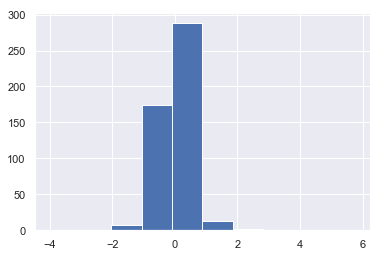

In [155]:
plt.hist(r.predict(poly3.fit_transform(X_val))-y_val)

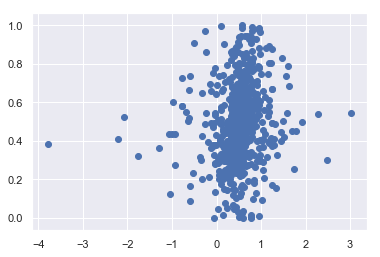

In [156]:
plt.scatter(r.predict(poly3.fit_transform(X_test)),y_test)

(array([  1.,   0.,   2.,   3.,  18., 142., 414.,  61.,   6.,   2.]),
 array([-4.17390079, -3.50796594, -2.84203109, -2.17609625, -1.5101614 ,
        -0.84422656, -0.17829171,  0.48764314,  1.15357798,  1.81951283,
         2.48544767]),
 <a list of 10 Patch objects>)

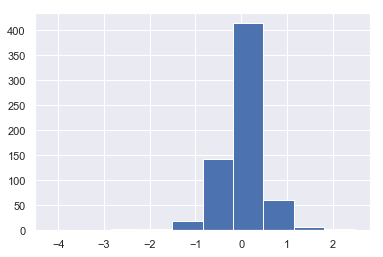

In [157]:
plt.hist(r.predict(poly3.fit_transform(X_test))-y_test)

In [158]:
RMSE(r.predict(poly3.transform(X_train)), y_train)

0.05042200889562712

In [159]:
RMSE(r.predict(poly3.transform(X_val)), y_val)

0.5464122709871797

In [160]:
RMSE(r.predict(poly3.transform(X_test)), y_test)

0.5019368695982911

In [161]:
feats = poly3.get_feature_names()
c = list(zip(feats,r.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x5 x52 x59', 0.028158423242938782),
 ('x3 x48 x59', 0.029220053532367108),
 ('x0^2', 0.02995333199664951),
 ('x2 x4^2', 0.030384522383269084),
 ('x3 x48 x60', 0.030565917337806506),
 ('x2 x5', 0.03064893601012375),
 ('x5 x51 x59', 0.036664788591461384),
 ('x1 x4 x48', 0.0376308016651948),
 ('x2^2 x59', 0.039216973303203714)]

### Polynomial (3rd-degree), regularized with Lasso

In [162]:
l = LassoCV()
l.fit(poly3.fit_transform(X_train),y_train)
l.score(poly3.fit_transform(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desc

0.1937757612048724

In [163]:
l.score(poly3.fit_transform(X_val),y_val)

0.0787380043319954

In [164]:
l.score(poly3.fit_transform(X_test),y_test)

0.06611153303239559

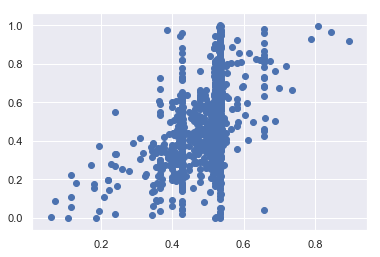

In [165]:
plt.scatter(l.predict(poly3.fit_transform(X_train)),y_train)

(array([  3.,  45., 111., 207., 347., 411., 255.,  59.,  12.,   8.]),
 array([-0.59116016, -0.47042185, -0.34968354, -0.22894523, -0.10820693,
         0.01253138,  0.13326969,  0.25400799,  0.3747463 ,  0.49548461,
         0.61622291]),
 <a list of 10 Patch objects>)

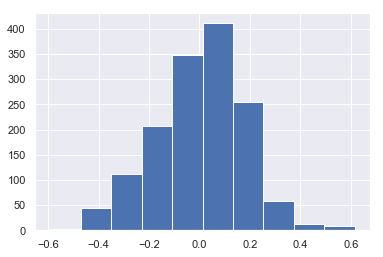

In [166]:
plt.hist(l.predict(poly3.fit_transform(X_train))-y_train)

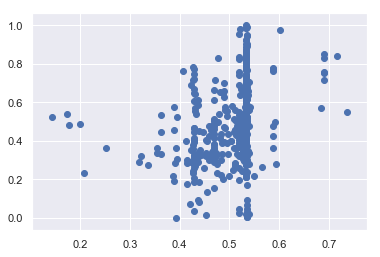

In [167]:
plt.scatter(l.predict(poly3.fit_transform(X_val)),y_val)

(array([ 14.,  29.,  40.,  67., 105., 110.,  70.,  34.,   7.,  11.]),
 array([-0.46551006, -0.36570099, -0.26589191, -0.16608283, -0.06627376,
         0.03353532,  0.1333444 ,  0.23315348,  0.33296255,  0.43277163,
         0.53258071]),
 <a list of 10 Patch objects>)

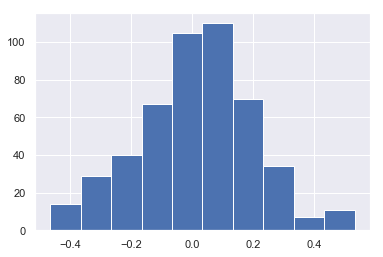

In [168]:
plt.hist(l.predict(poly3.fit_transform(X_val))-y_val)

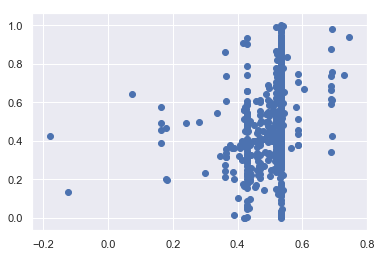

In [169]:
plt.scatter(l.predict(poly3.fit_transform(X_test)),y_test)

(array([  5.,  20.,  37.,  74., 116., 172., 108.,  82.,  23.,  12.]),
 array([-0.60552811, -0.49152892, -0.37752973, -0.26353053, -0.14953134,
        -0.03553214,  0.07846705,  0.19246624,  0.30646544,  0.42046463,
         0.53446382]),
 <a list of 10 Patch objects>)

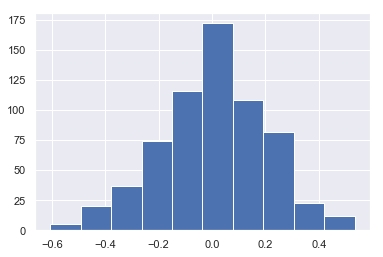

In [170]:
plt.hist(l.predict(poly3.fit_transform(X_test))-y_test)

In [171]:
RMSE(l.predict(poly3.transform(X_train)), y_train)

0.17758103085980703

In [172]:
RMSE(l.predict(poly3.transform(X_val)), y_val)

0.18958728627856664

In [173]:
RMSE(l.predict(poly3.transform(X_test)), y_test)

0.1997812742699229

In [174]:
feats = poly3.get_feature_names()
c = list(zip(feats,l.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x28^2 x48', 0.00011846288961174029),
 ('x17 x64^2', 0.00012829868244750557),
 ('x56 x57^2', 0.00014276119462426837),
 ('x9^2 x48', 0.00016961073819779095),
 ('x29^2 x52', 0.00020092189139530694),
 ('x19 x49^2', 0.00022941706097944644),
 ('x37^2 x47', 0.00023965337562426484),
 ('x18^2 x62', 0.00025986100886940354),
 ('x17^3', 0.0003029060426698482)]

### Random Forests

In [118]:
rf = RandomForestRegressor(n_estimators=800, max_features=4)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9077235677238382

In [120]:
rf.score(X_val, y_val)

0.26826636132184456

In [121]:
rf.score(X_test, y_test)

0.27714674049041366

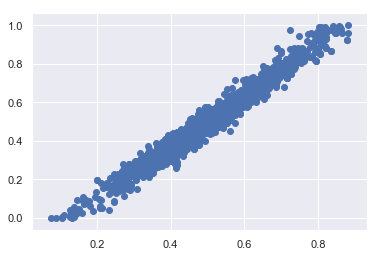

In [122]:
plt.scatter(rf.predict(X_train),y_train)

(array([  1.,   9.,  40., 111., 236., 431., 409., 165.,  47.,   9.]),
 array([-0.25126246, -0.20691606, -0.16256966, -0.11822326, -0.07387686,
        -0.02953047,  0.01481593,  0.05916233,  0.10350873,  0.14785513,
         0.19220152]),
 <a list of 10 Patch objects>)

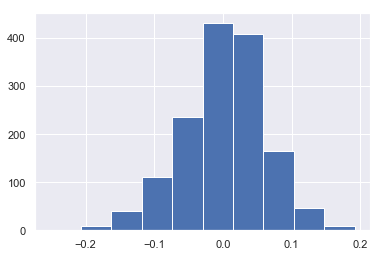

In [123]:
plt.hist(rf.predict(X_train)-y_train)

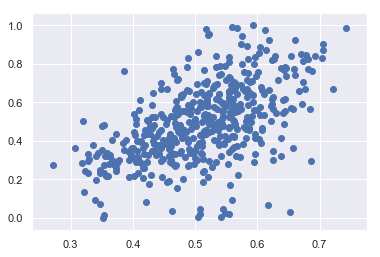

In [124]:
plt.scatter(rf.predict(X_val),y_val)

(array([  1.,   9.,  40., 111., 236., 431., 409., 165.,  47.,   9.]),
 array([-0.25126246, -0.20691606, -0.16256966, -0.11822326, -0.07387686,
        -0.02953047,  0.01481593,  0.05916233,  0.10350873,  0.14785513,
         0.19220152]),
 <a list of 10 Patch objects>)

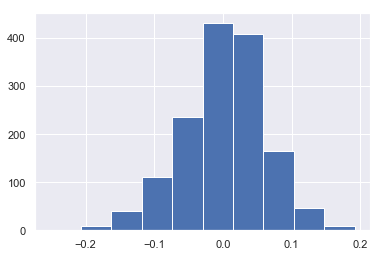

In [125]:
plt.hist(rf.predict(X_train)-y_train)

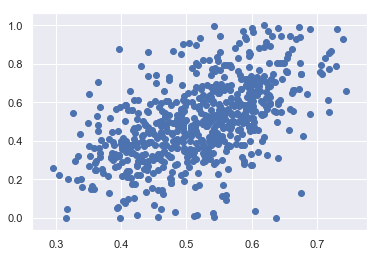

In [126]:
plt.scatter(rf.predict(X_test),y_test)

(array([  1.,   9.,  40., 111., 236., 431., 409., 165.,  47.,   9.]),
 array([-0.25126246, -0.20691606, -0.16256966, -0.11822326, -0.07387686,
        -0.02953047,  0.01481593,  0.05916233,  0.10350873,  0.14785513,
         0.19220152]),
 <a list of 10 Patch objects>)

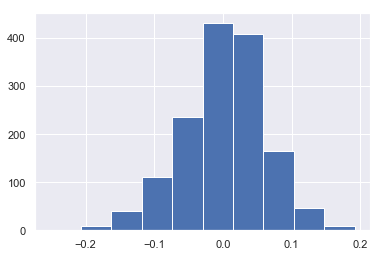

In [127]:
plt.hist(rf.predict(X_train)-y_train)

In [128]:
RMSE(rf.predict(X_train),y_train)

0.06007780331266324

In [129]:
RMSE(rf.predict(X_val),y_val)

0.1689639845276208

In [130]:
RMSE(rf.predict(X_test),y_test)

0.17576497821072978

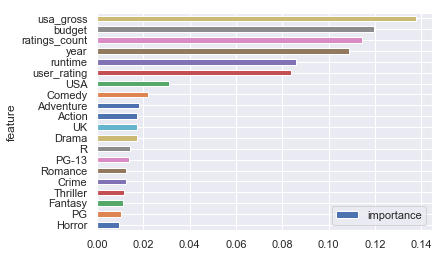

In [132]:
feat_imps = list(zip(features,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(20).plot(x='feature',y='importance',kind='barh')

### Gradient-Boosted

In [119]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991902100009933

In [134]:
gbm.score(X_val, y_val)

0.12319764306453163

In [135]:
gbm.score(X_test, y_test)

0.10902573994406628

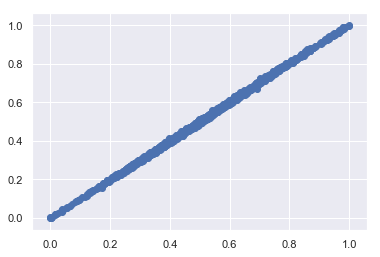

In [136]:
plt.scatter(gbm.predict(X_train),y_train)

(array([  1.,  11.,  26.,  86., 242., 609., 311., 123.,  40.,   9.]),
 array([-0.02598254, -0.02136413, -0.01674573, -0.01212732, -0.00750891,
        -0.0028905 ,  0.00172791,  0.00634631,  0.01096472,  0.01558313,
         0.02020154]),
 <a list of 10 Patch objects>)

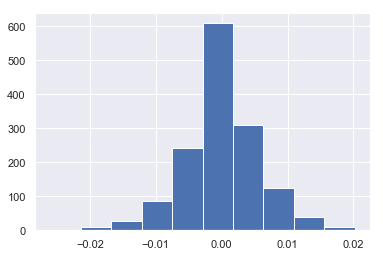

In [137]:
plt.hist(gbm.predict(X_train)-y_train)

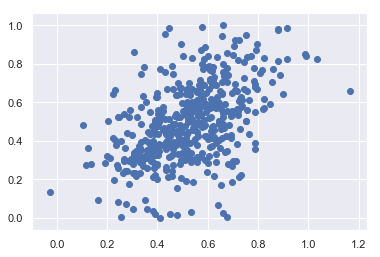

In [138]:
plt.scatter(gbm.predict(X_val),y_val)

(array([  4.,  11.,  32.,  88., 151., 113.,  56.,  20.,   9.,   3.]),
 array([-0.55757271, -0.43443464, -0.31129656, -0.18815849, -0.06502041,
         0.05811766,  0.18125574,  0.30439381,  0.42753189,  0.55066996,
         0.67380804]),
 <a list of 10 Patch objects>)

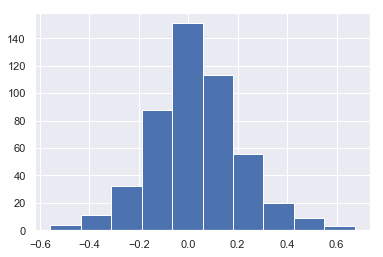

In [139]:
plt.hist(gbm.predict(X_val)-y_val)

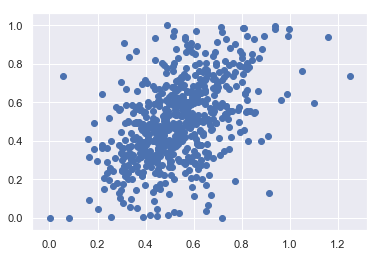

In [140]:
plt.scatter(gbm.predict(X_test),y_test)

(array([  2.,   8.,  37.,  91., 229., 167.,  78.,  28.,   7.,   2.]),
 array([-0.67764951, -0.53142237, -0.38519523, -0.23896808, -0.09274094,
         0.0534862 ,  0.19971334,  0.34594048,  0.49216762,  0.63839476,
         0.78462191]),
 <a list of 10 Patch objects>)

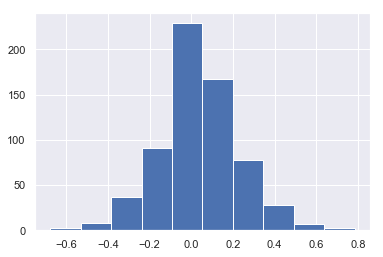

In [141]:
plt.hist(gbm.predict(X_test)-y_test)

In [142]:
RMSE(gbm.predict(X_train),y_train)

0.005628009887354448

In [143]:
RMSE(gbm.predict(X_val),y_val)

0.18495602645413253

In [144]:
RMSE(gbm.predict(X_test),y_test)

0.1951371022949592

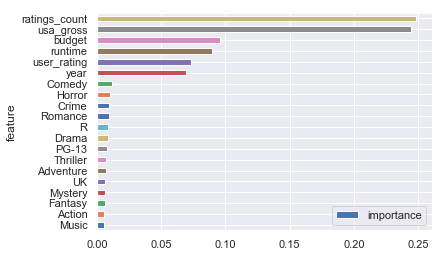

In [145]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(20).plot(x='feature',y='importance',kind='barh')